In [1]:
!pip install geopandas
!pip install cartopy
!pip install shapely
!pip install --no-binary shapely shapely --force

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 83.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 KB 11.9 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 90.4 MB/s eta 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
from shapely.geometry import Point
import shapefile as shp
import geopandas as gpd
sns.set_style('whitegrid')

#Q1

In [ ]:
fp = r'/content/india-polygon.shp'
map_df = gpd.read_file(fp) 
map_df.head()

,id,st_nm,geometry
0,NaN,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,NaN,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,NaN,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,NaN,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,NaN,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


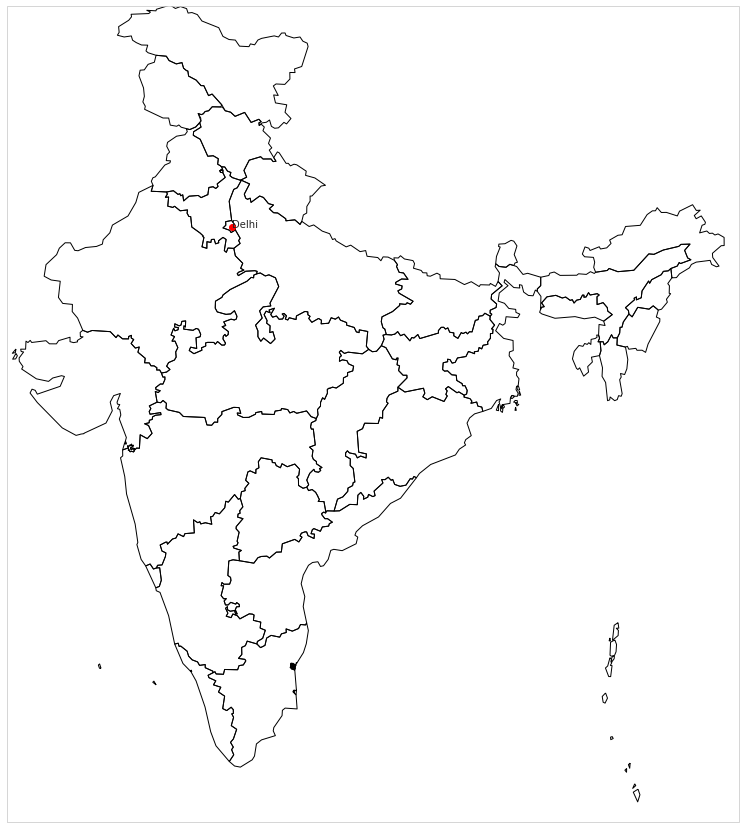

In [ ]:
plt.figure(figsize=(15,15)) 

# Plot the data using Cartopy and Matplotlib
px = plt.axes(projection=ccrs.PlateCarree())
map_df.plot(ax=px,edgecolor='black')
delhi_lon, delhi_lat = 77.23, 28.61
plt.plot([ 77.23], [28.61],color='red',linewidth= 2,marker='o', transform=ccrs.Geodetic())
plt.text(delhi_lon, delhi_lat, 'Delhi',  transform=ccrs.Geodetic())
plt.show()

In [ ]:
df = pd.read_csv("/content/in.csv")
df = df[df["capital"]=="admin"]
df.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Amaravathi,16.5131,80.5165,India,IN,Andhra Pradesh,admin,87486.0,87486.0
1,Port Blair,11.6667,92.7500,India,IN,Andaman and Nicobar Islands,admin,127562.0,112050.0
2,Itanagar,27.1000,93.6200,India,IN,Arunachal Pradesh,admin,59490.0,59490.0
3,Dispur,26.1500,91.7700,India,IN,Assam,admin,957352.0,957352.0
4,Patna,25.6100,85.1414,India,IN,Bihar,admin,1684222.0,1684222.0


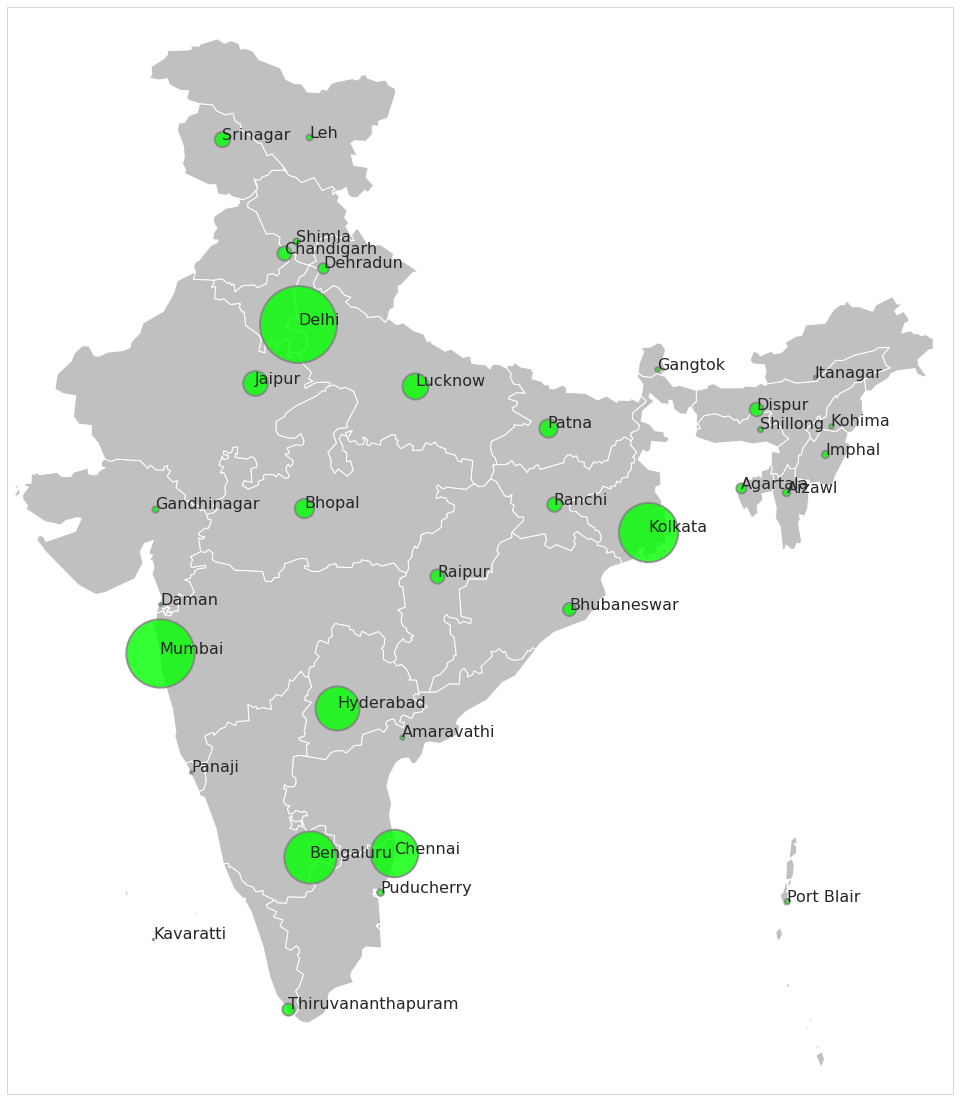

In [ ]:
fig = plt.figure(figsize=(20, 20))
# Plot the data using Cartopy and Matplotlib
ax = plt.axes(projection=ccrs.PlateCarree())
map_df.plot(ax=ax, facecolor='silver', edgecolor='white')
ax.set_extent([68, 98, 6, 38], crs=ccrs.PlateCarree())

for i in range(len(df)):
    plt.scatter(x=[df["lng"][i]], y=[df["lat"][i]], color="lime", 
                s=df["population"][i]/5000, alpha=0.8, edgecolors="grey", 
                linewidth=2, transform=ccrs.PlateCarree())
    # Add city name text
    plt.text(df["lng"][i] , df["lat"][i] , df["city"][i], 
              transform=ccrs.PlateCarree(),fontsize=16)

plt.show()


#Q2

In [3]:
df = pd.read_excel("/content/Flightschedule.xlsx")
df = df[df["Routing"]=="Non Stop"].reset_index()
df.head()

,index,Origin,Destination,Flight Number,Departure Time,Arrival Time,Flight Time,Routing,Days Of Operations,Connection Flight No,Effective From,EffectiveTo
0,26,Abu Dhabi,Delhi,G8 76,21:40,02:40,03:30,Non Stop,Daily,-,2023-02-02,2023-03-25
1,42,Abu Dhabi,Kannur,G8 54,22:20,03:40,03:50,Non Stop,Daily,-,2023-02-02,2023-03-25
2,45,Abu Dhabi,Kochi,G8 64,23:30,05:00,04:00,Non Stop,"Tu,W,F,Su",-,2023-02-02,2023-02-22
3,61,Abu Dhabi,Mumbai,G8 6,23:30,04:10,03:10,Non Stop,Daily,-,2023-02-02,2023-02-05
4,123,Ahmedabad,Bengaluru,G8 802,09:25,11:25,02:00,Non Stop,Daily,-,2023-02-02,2023-02-06


In [4]:
lst_u=df["Destination"].unique()
lst_u

['Abu Dhabi' 'Ahmedabad' 'Amritsar' 'Bagdogra' 'Bangkok' 'Bengaluru'
 'Chandigarh' 'Chennai' 'Dammam' 'Dehra Dun' 'Delhi' 'Dubai' 'Goa'
 'Goa-New Goa' 'Guwahati' 'Hyderabad' 'Jaipur' 'Jammu' 'Kannur' 'Kochi'
 'Kolkata' 'Kuwait' 'Leh' 'Lucknow' 'Male' 'Mumbai' 'Muscat' 'Nagpur'
 'Patna' 'Phuket' 'Port Blair' 'Pune' 'Ranchi' 'Srinagar' 'Thoise'
 'Varanasi']


In [5]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="geoapiExercises")
dict={}
for i in lst_u:    
    location = geolocator.geocode(i)
    dict.update({i:[location.latitude,location.longitude]})

{'Abu Dhabi': [24.4538352, 54.3774014], 'Ahmedabad': [23.0216238, 72.5797068], 'Amritsar': [31.6343083, 74.8736788], 'Bagdogra': [26.6988847, 88.3200303], 'Bangkok': [13.7524938, 100.4935089], 'Bengaluru': [12.9767936, 77.590082], 'Chandigarh': [30.72984395, 76.78414567016054], 'Chennai': [13.0836939, 80.270186], 'Dammam': [26.4367824, 50.1039991], 'Dehra Dun': [30.3255646, 78.0436813], 'Delhi': [28.6517178, 77.2219388], 'Dubai': [25.074282349999997, 55.18853865430702], 'Goa': [15.3004543, 74.0855134], 'Goa-New Goa': [15.486913, 73.818794], 'Guwahati': [26.1805978, 91.753943], 'Hyderabad': [17.38878595, 78.46106473453146], 'Jaipur': [26.9154576, 75.8189817], 'Jammu': [32.7185614, 74.8580917], 'Kannur': [11.8763836, 75.3737973], 'Kochi': [9.9674277, 76.2454436], 'Kolkata': [22.5726723, 88.3638815], 'Kuwait': [29.2733964, 47.4979476], 'Leh': [34.1642029, 77.5848133], 'Lucknow': [26.8381, 80.9346001], 'Male': [4.1779879, 73.5107387], 'Mumbai': [19.0785451, 72.878176], 'Muscat': [23.61515,

In [11]:
path = gpd.datasets.get_path('naturalearth_lowres')
bord = gpd.read_file(path)

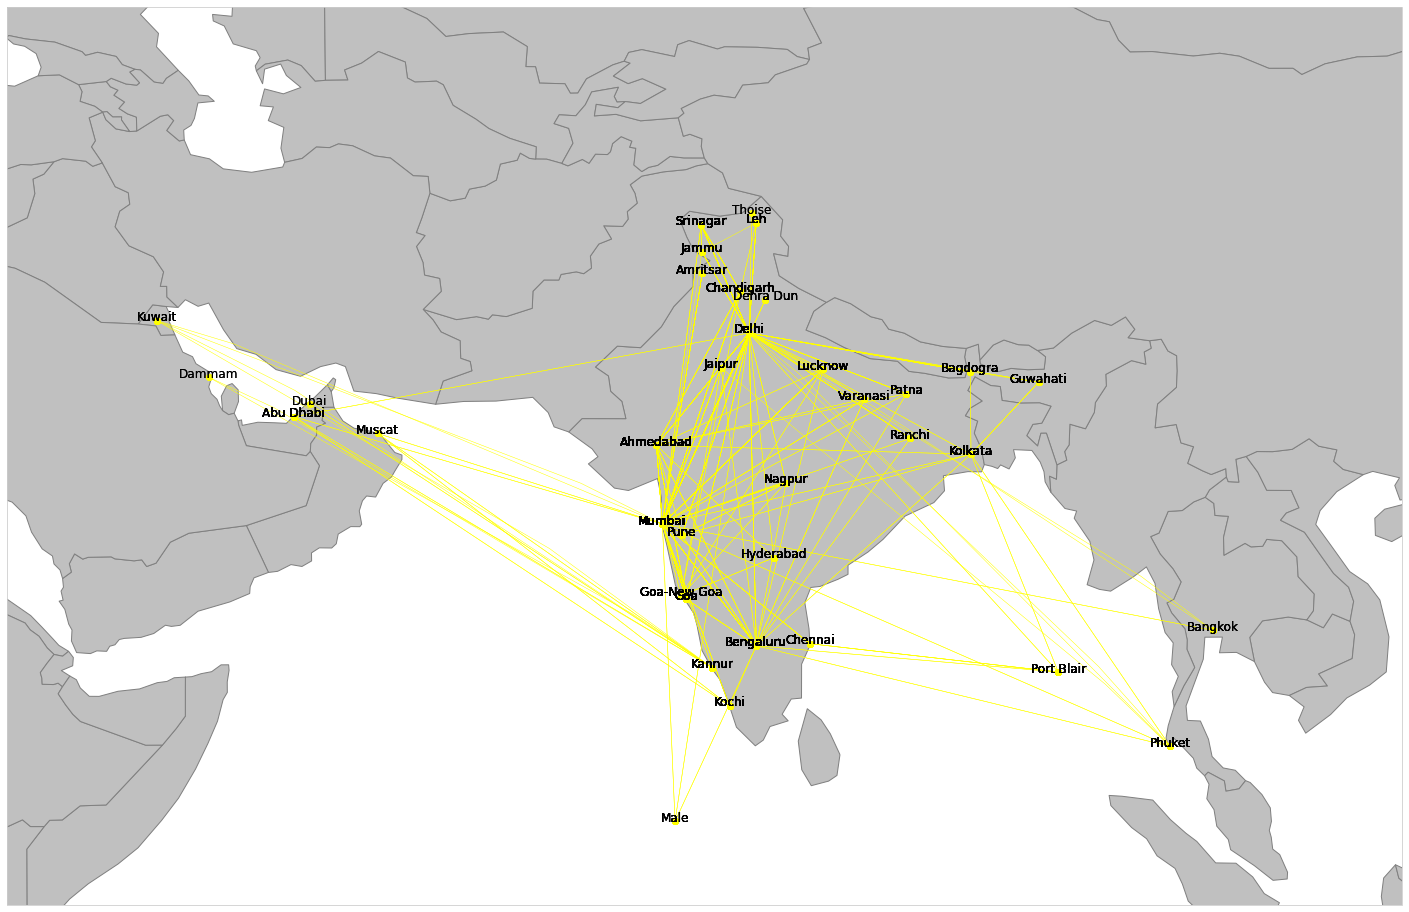

In [12]:
fig = plt.figure(figsize=(25, 25))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([40, 120, 0, 45], crs=ccrs.PlateCarree())
for i in range(len(df)):
    origin_lat, origin_lon = dict[df["Origin"][i]][0], dict[df["Origin"][i]][1]
    dest_lat, dest_lon = dict[df["Destination"][i]][0], dict[df["Destination"][i]][1]


    plt.plot([origin_lon, dest_lon], [origin_lat, dest_lat], color="yellow", marker='o', transform=ccrs.Geodetic())
    plt.text(origin_lon, origin_lat, df["Origin"][i], fontsize=13, horizontalalignment="center", transform=ccrs.Geodetic()) 
    plt.text(dest_lon, dest_lat, df["Destination"][i], fontsize=13, horizontalalignment="center",transform=ccrs.Geodetic()) 

bord.plot(ax=ax, facecolor='silver', edgecolor='grey')
plt.show()
